#### Load libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt
from scipy.io import loadmat

## 1 Multi-class Classification

#### 1.1 Dataset

In [26]:
input_layer_size = 400
num_labels = 10

data = loadmat('ex3data1.mat')
x, y = data['X'], data['y']
x = np.insert(x, 0, 1, axis=1)
y[y == 10] = 0

m = y.size

print('x:', x.shape)
print('y:', y.shape, 'unique y:', np.unique(y))


x: (5000, 401)
y: (5000, 1) unique y: [0 1 2 3 4 5 6 7 8 9]


In [31]:
p = x.shape[0]
p.shape

AttributeError: 'int' object has no attribute 'shape'

#### 1.2 Visualizing the data

(-0.5, 199.5, 19.5, -0.5)

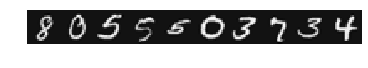

In [78]:
sample = np.random.choice(x.shape[0], 10)
plt.imshow(x[sample,1:].reshape(-1,20).T, cmap = 'gray')
plt.axis('off')

#### 1.3 Vectorizing logisitic regression

Creating sigmoid function

In [80]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

Creating unregularized cost function

In [92]:
def cost(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    cost = -1*(1/m)*(np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y))
    return cost

In [90]:
pop = np.array([[1,2,3,4,5],[6,7,8,9,0]])
stop = np.array([1,2,3,4,5])
print('pop dim:', pop.shape)
print('stop dim:', stop.shape)


pop dim: (2, 5)
stop dim: (5,)
